<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
#Data structure
summary = pd.DataFrame({
    'Column Name': df.columns, 
    'Data Type': df.dtypes.values, 
    'Total Count': df.count().values,  
    'Missing Values': df.isnull().sum().values
})

# Display the summary information
print(f"Dataset Shape: {df.shape}")

#save in a csv file
summary.to_csv('summary_info.csv', index=False)

Dataset Shape: (65437, 114)


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [5]:
# Create a new dataframe to avoid losing the original data
df_cleaned = df.copy()

# Drop columns where missing values are too big (more than 60k)
columns_to_remove = df_cleaned.columns[df_cleaned.isnull().sum() > 60000]
df_cleaned.drop(columns=columns_to_remove, inplace=True)
print(f"Columns removed: {len(columns_to_remove)}")

# Impute missing values in categorical columns with 'Unknown'
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = df_cleaned[column].fillna('Unknown')

# Impute missing values in numerical columns with mean or median based on distribution
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    mean = df_cleaned[column].mean()
    median = df_cleaned[column].median()
        
    # Check if the distribution is symmetric or skewed
    if abs(mean - median) < 0.1 * mean:  # If the difference between mean and median is small
        df_cleaned[column] = df_cleaned[column].fillna(mean)
    else:
        df_cleaned[column] = df_cleaned[column].fillna(median)

print(f"Dataset Shape: {df_cleaned.shape}")
print(df_cleaned.head())


Columns removed: 2
Dataset Shape: (65437, 112)
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time    Unknown  Apples   
4   Student, full-time    Unknown  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                          

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
#Calculate the value counts 
print(df_cleaned['Employment'].value_counts())
print(df_cleaned['JobSat'].value_counts())
print(df_cleaned['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


/tmp/ipykernel_3295/1706954588.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['JobSat'], shade=True)


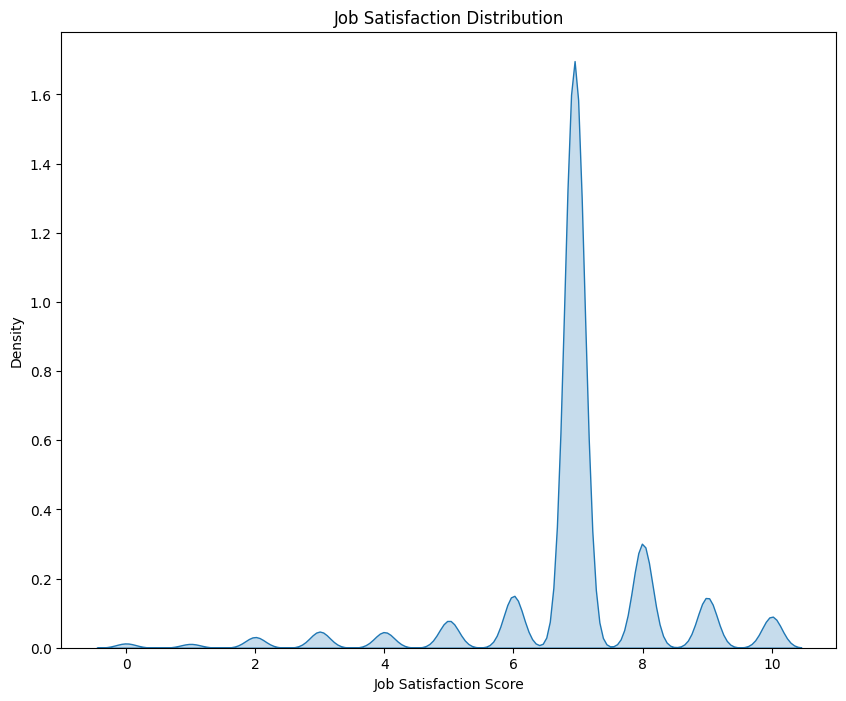

In [7]:
#Create KDE plot
plt.figure(figsize=(10,8))
sns.kdeplot(df_cleaned['JobSat'], shade=True)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.show()

The KDE plot shows a peak around 7, suggesting that most respondents rate their job satisfaction at this level. 
The distribution is slightly skewed, indicating that while most employees are satisfied, there is some variation across the dataset.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64
LanguageWantToWorkWith
Python                     25047
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Name: count, dtype: int64
Languages in 'Have Worked With': 50
Languages in 'Want to Work With': 50


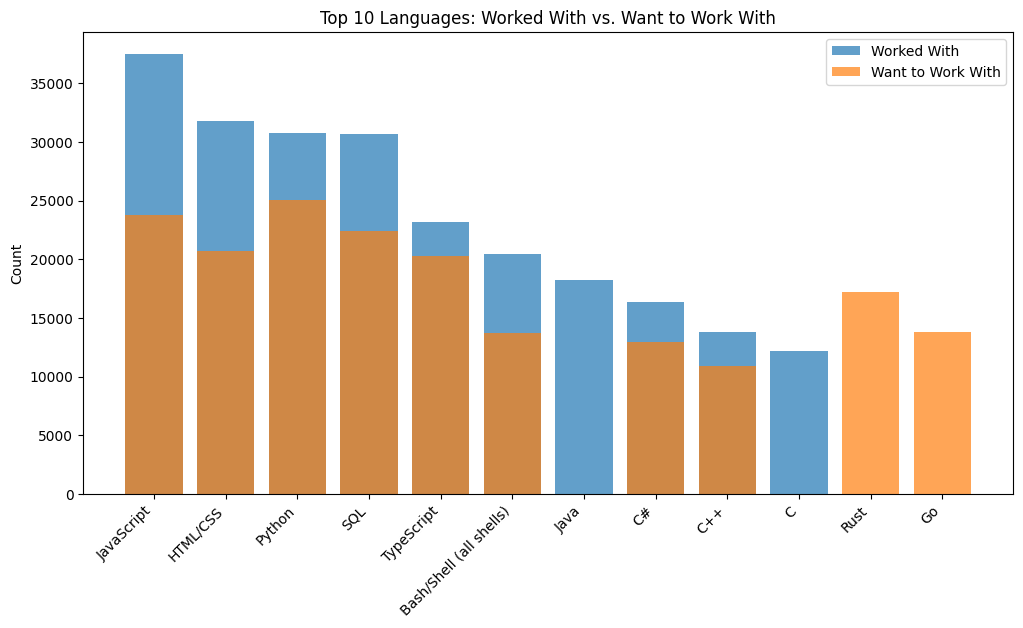

In [8]:
#most frequent values and split the languages
# Split and count each language individually
have_worked_counts = df_cleaned['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()
want_to_work_counts = df_cleaned['LanguageWantToWorkWith'].str.split(';').explode().value_counts()
print(have_worked_counts.head(10))  # Top 10 languages worked with
print(want_to_work_counts.head(10))  # Top 10 languages wanted
print(f"Languages in 'Have Worked With': {len(have_worked_counts)}")
print(f"Languages in 'Want to Work With': {len(want_to_work_counts)}")

# Exclude "Unknown" from both categories
have_worked_filtered = have_worked_counts.drop("Unknown", errors="ignore")
want_to_work_filtered = want_to_work_counts.drop("Unknown", errors="ignore")

# Select the top 10 most common languages (excluding "Unknown")
top_worked = have_worked_filtered.nlargest(10)
top_want = want_to_work_filtered.nlargest(10)

# Create the bar plot
plt.figure(figsize=(12,6))
plt.bar(top_worked.index, top_worked.values, alpha=0.7, label='Worked With')
plt.bar(top_want.index, top_want.values, alpha=0.7, label='Want to Work With')

plt.title("Top 10 Languages: Worked With vs. Want to Work With")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


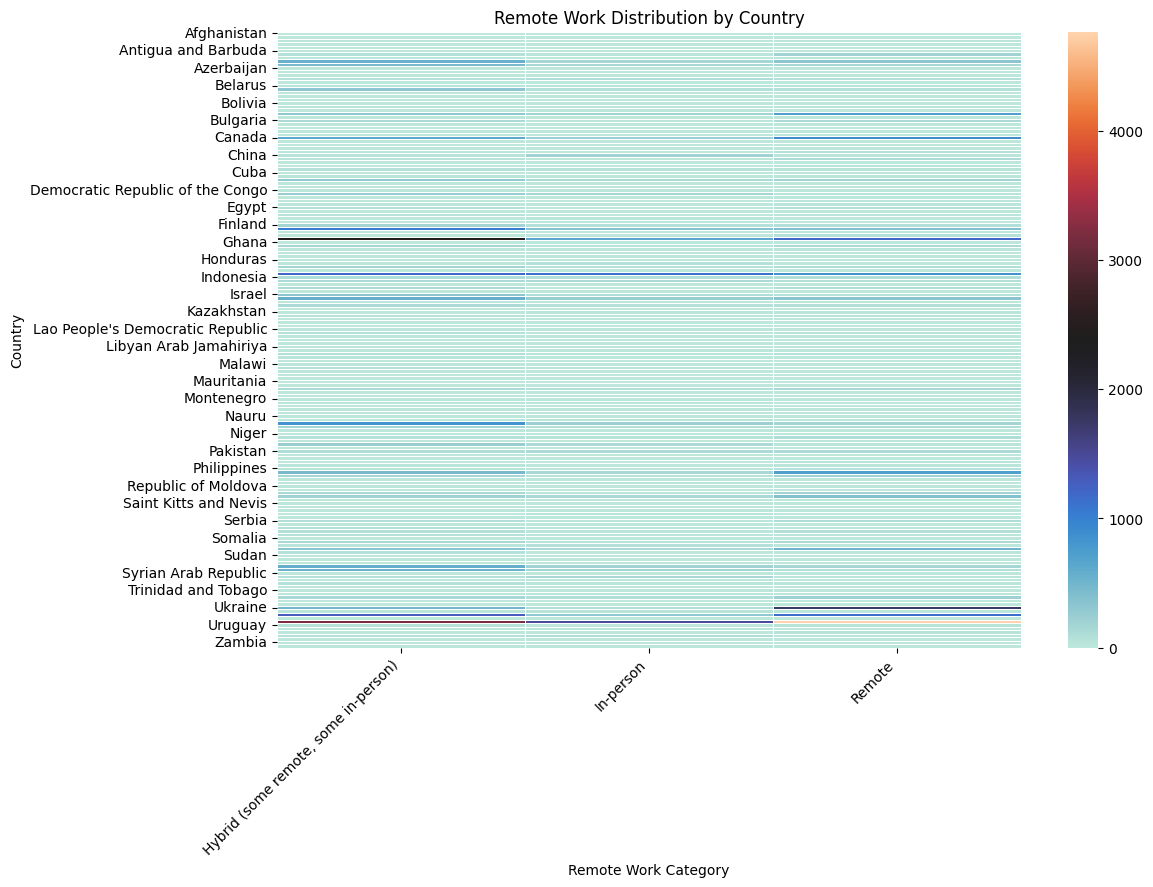

In [9]:
# Excluding Unknown
df_filtered = df_cleaned[(df_cleaned['RemoteWork'] != 'Unknown') & (df_cleaned['Country'] != 'Unknown')]

#Create table for frequency
heatmap_data = pd.crosstab(df_filtered['Country'], df_filtered['RemoteWork'])

#create Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="icefire", linewidths=0.5)

plt.title("Remote Work Distribution by Country")
plt.xlabel("Remote Work Category")
plt.ylabel("Country")
plt.xticks(rotation=45, ha="right")
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [10]:
!pip install scipy
from scipy.stats import spearmanr

In [11]:
# Exclude 'Unknown' before conversion
df_filtered = df_cleaned[df_cleaned['YearsCodePro'] != 'Unknown'].copy()

# Convert YearsCodePro to numeric
df_filtered['YearsCodePro_numeric'] = df_filtered['YearsCodePro'].replace({
    'More than 50 years': 51,
    'Less than 1 year': 0.5
}).astype(float)

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df_filtered['YearsCodePro_numeric'], df_filtered['JobSat'])

print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p:.2f})")


Spearman Correlation: 0.09 (p-value: 0.00)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


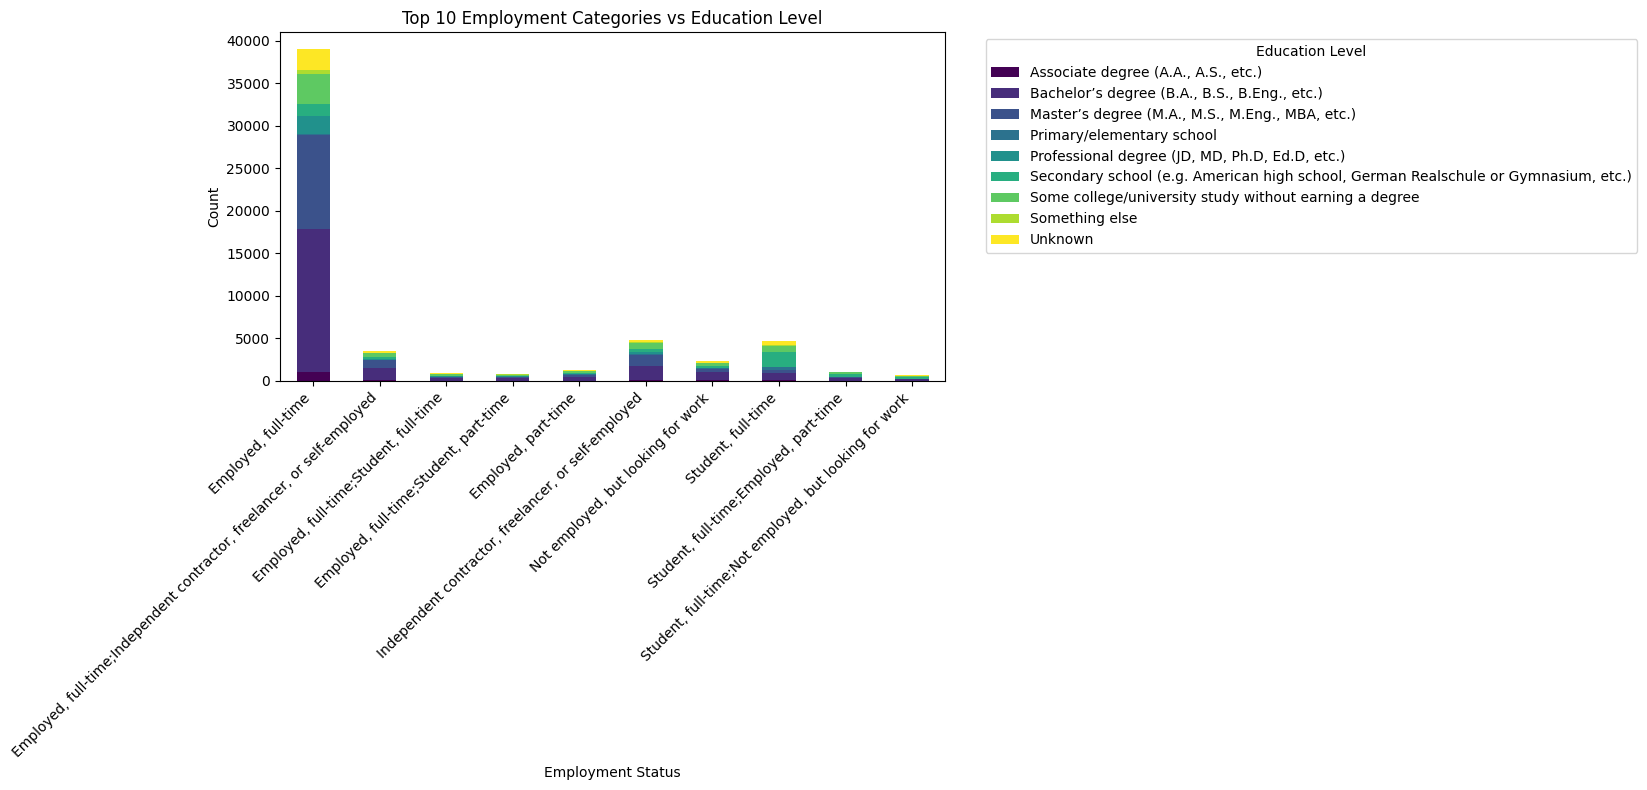

In [12]:
# Get the top 10 employment categories
top_employment = df_cleaned['Employment'].value_counts().nlargest(10).index

# Filter the dataframe
df_filtered = df_cleaned[df_cleaned['Employment'].isin(top_employment)]

# Cross-tabulation
employment_edlevel = pd.crosstab(df_filtered['Employment'], df_filtered['EdLevel'])

# Create a stacked bar plot
employment_edlevel.plot(kind='bar', stacked=True, figsize=(16,8), colormap='viridis')

# Add title and labels
plt.title('Top 10 Employment Categories vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [13]:
#new CSV file
df_cleaned.to_csv('cleaned_survey_data.csv', index=False)

In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
